# Smart Queue Monitoring System - Manufacturing Scenario

## Set Up

In [1]:
%env PATH=/opt/conda/bin:/opt/spark-2.4.3-bin-hadoop2.7/bin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/opt/intel_devcloud_support
import os
import sys
sys.path.insert(0, os.path.abspath('/opt/intel_devcloud_support'))
sys.path.insert(0, os.path.abspath('/opt/intel'))

env: PATH=/opt/conda/bin:/opt/spark-2.4.3-bin-hadoop2.7/bin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/opt/intel_devcloud_support


In [2]:
import videoHtml
videoHtml.videoHTML('Manufacturing', ['original_videos/Manufacturing.mp4'])

In [3]:
cpu_job_id = !qsub queue_job.sh -d . -l nodes=1:tank-870:i5-6500te -F "/data/models/intel/person-detection-retail-0013/FP32/person-detection-retail-0013 CPU /data/resources/manufacturing.mp4 /data/queue_param/manufacturing.npy /output/results/manufacturing/cpu 2" -N store_core

print(cpu_job_id[0])

nJIk5D1pSowGm4DM05JZB31bSZ3yjonf


#### Check Job Status

To check on the job that was submitted, use `liveQStat` to check the status of the job.

Column `S` shows the state of your running jobs.

For example:
- If `JOB ID`is in Q state, it is in the queue waiting for available resources.
- If `JOB ID` is in R state, it is running.

In [23]:
import liveQStat
liveQStat.liveQStat()

###### Get Results

Run the next cell to retrieve your job's results.

In [4]:
import get_results
get_results.getResults(cpu_job_id[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:nJIk5D1pSowGm4DM05JZB31bSZ3yjonf) are ready.
Please wait............Success!
output.tgz was downloaded in the same folder as this notebook.


###### Unpack your output files and view stdout.log

In [5]:
!tar zxf output.tgz

In [6]:
!cat stdout.log

Total People in frame = 7
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 9
Number of people in queue = {1: 1, 2: 2}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 7
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 7
Number of people in queue = {1: 1, 2

###### View stderr.log
This can be used for debugging

In [7]:
!cat stderr.log

person_detect.py:69: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.model=IENetwork(self.model_structure, self.model_weights)


###### View Output Video
Run the cell below to view the output video. If inference was successfully run, you should see a video with bounding boxes drawn around each person detected.

In [8]:
import videoHtml

videoHtml.videoHTML('Manufacturing CPU', ['results/manufacturing/cpu/output_video.mp4'])

In [9]:
#Submit job to the queue
gpu_job_id = !qsub queue_job.sh -d . -l nodes=tank-870:i5-6500te:intel-hd-530 -F "/data/models/intel/person-detection-retail-0013/FP32/person-detection-retail-0013 GPU /data/resources/manufacturing.mp4 /data/queue_param/manufacturing.npy /output/results/manufacturing/gpu 2" -N store_core
print(gpu_job_id[0])

Y1rrqLnqG4YrmOTYfosCZcGrxNQJ9Smr


### Check Job Status

To check on the job that was submitted, use `liveQStat` to check the status of the job.

Column `S` shows the state of your running jobs.

For example:
- If `JOB ID`is in Q state, it is in the queue waiting for available resources.
- If `JOB ID` is in R state, it is running.

In [ ]:
import liveQStat
liveQStat.liveQStat()

###### Get Results

Run the next cell to retrieve your job's results.

In [10]:
import get_results
get_results.getResults(gpu_job_id[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:Y1rrqLnqG4YrmOTYfosCZcGrxNQJ9Smr) are ready.
Please wait.......................................Success!
output.tgz was downloaded in the same folder as this notebook.


###### Unpack your output files and view stdout.log

In [11]:
!tar zxf output.tgz

In [12]:
!cat stdout.log

Total People in frame = 7
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 9
Number of people in queue = {1: 1, 2: 2}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 7
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 7
Number of people in queue = {1: 1, 2

###### View stderr.log
This can be used for debugging

In [13]:
!cat stderr.log

person_detect.py:69: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.model=IENetwork(self.model_structure, self.model_weights)


###### View Output Video
Run the cell below to view the output video. If inference was successfully run, you should see a video with bounding boxes drawn around each person detected.

In [14]:
import videoHtml

videoHtml.videoHTML('Manufacturing GPU', ['results/manufacturing/gpu/output_video.mp4'])

In [15]:
#Submit job to the queue
vpu_job_id = !qsub queue_job.sh -d . -l nodes=tank-870:i5-6500te:intel-ncs2 -F "/data/models/intel/person-detection-retail-0013/FP16/person-detection-retail-0013 MYRIAD /data/resources/manufacturing.mp4 /data/queue_param/manufacturing.npy /output/results/manufacturing/vpu 2" -N store_core

print(vpu_job_id[0])

whrLOILqMUyMee4y347Fo4sCzfYsPjkT


### Check Job Status

To check on the job that was submitted, use `liveQStat` to check the status of the job.

Column `S` shows the state of your running jobs.

For example:
- If `JOB ID`is in Q state, it is in the queue waiting for available resources.
- If `JOB ID` is in R state, it is running.

In [ ]:
import liveQStat
liveQStat.liveQStat()

###### Get Results

Run the next cell to retrieve your job's results.

In [16]:
import get_results
get_results.getResults(vpu_job_id[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:whrLOILqMUyMee4y347Fo4sCzfYsPjkT) are ready.
Please wait........................Success!
output.tgz was downloaded in the same folder as this notebook.


###### Unpack your output files and view stdout.log

In [17]:
!tar zxf output.tgz

In [18]:
!cat stdout.log

Total People in frame = 7
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 8
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 7
Number of people in queue = {1: 1, 2: 1}
Total People in frame = 7
Number of people in queue = {1: 1, 2

###### View stderr.log
This can be used for debugging

In [19]:
!cat stderr.log

person_detect.py:69: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.model=IENetwork(self.model_structure, self.model_weights)


###### View Output Video
Run the cell below to view the output video. If inference was successfully run, you should see a video with bounding boxes drawn around each person detected.

In [20]:
import videoHtml

videoHtml.videoHTML('Manufacturing VPU', ['results/manufacturing/vpu/output_video.mp4'])

In [27]:
#Submit job to the queue
fpga_job_id = !qsub queue_job.sh -d . -l nodes=1:tank-870:i5-6500te:iei-mustang-f100-a10 -F "/data/models/intel/person-detection-retail-0013/FP16/person-detection-retail-0013 HETERO:FPGA,CPU /data/resources/manufacturing.mp4 /data/queue_param/manufacturing.npy /output/results/manufacturing/fpga 2" -N store_core
print(fpga_job_id[0])

eaolcTBArkc0JEStYAfJjNc0GI03zaz9


### Check Job Status

To check on the job that was submitted, use `liveQStat` to check the status of the job.

Column `S` shows the state of your running jobs.

For example:
- If `JOB ID`is in Q state, it is in the queue waiting for available resources.
- If `JOB ID` is in R state, it is running.

In [49]:
import liveQStat
liveQStat.liveQStat()

###### Get Results

Run the next cell to retrieve your job's results.

In [28]:
import get_results
get_results.getResults(fpga_job_id[0], filename='output.tgz', blocking=True)

getResults() is blocking until results of the job (id:eaolcTBArkc0JEStYAfJjNc0GI03zaz9) are ready.
Please wait..........Success!
output.tgz was downloaded in the same folder as this notebook.


###### Unpack your output files and view stdout.log

In [29]:
!tar zxf output.tgz

In [30]:
!cat stdout.log

INTELFPGAOCLSDKROOT is set to /opt/altera/aocl-pro-rte/aclrte-linux64. Using that.

aoc was not found, but aocl was found. Assuming only RTE is installed.

AOCL_BOARD_PACKAGE_ROOT is set to /opt/intel/openvino/bitstreams/a10_vision_design_sg2_bitstreams/BSP/a10_1150_sg2. Using that.
Adding /opt/altera/aocl-pro-rte/aclrte-linux64/bin to PATH
Adding /opt/altera/aocl-pro-rte/aclrte-linux64/linux64/lib to LD_LIBRARY_PATH
Adding /opt/altera/aocl-pro-rte/aclrte-linux64/host/linux64/lib to LD_LIBRARY_PATH
Adding /opt/intel/openvino/bitstreams/a10_vision_design_sg2_bitstreams/BSP/a10_1150_sg2/linux64/lib to LD_LIBRARY_PATH
[setupvars.sh] OpenVINO environment initialized
aocl program: Running program from /opt/intel/openvino/bitstreams/a10_vision_design_sg2_bitstreams/BSP/a10_1150_sg2/linux64/libexec
Failed to open file: /opt/intel/openvino/bitstreams/a10_vision_design_sg1_bitstreams/2019R4_PL1_FP16_MobileNet_Clamp.aocx
Error: Failed to find aocx
aocl program: Program failed.
Total People in fr

###### View stderr.log
This can be used for debugging

In [31]:
!cat stderr.log

Couldn't open file /opt/intel/openvino/bitstreams/a10_vision_design_sg1_bitstreams/2019R4_PL1_FP16_MobileNet_Clamp.aocx for reading
person_detect.py:69: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.model=IENetwork(self.model_structure, self.model_weights)


###### View Output Video
Run the cell below to view the output video. If inference was successfully run, you should see a video with bounding boxes drawn around each person detected.

In [32]:
import videoHtml

videoHtml.videoHTML('Manufacturing FPGA', ['results/manufacturing/fpga/output_video.mp4'])

## Assess Performance

Run the cells below to compare the performance across all 4 devices. The following timings for the model are being comapred across all 4 devices:

- Model Loading Time
- Average Inference Time
- FPS

In [33]:
import matplotlib.pyplot as plt

device_list=['cpu', 'gpu', 'fpga', 'vpu']
inference_time=[]
fps=[]
model_load_time=[]

for device in device_list:
    with open('results/manufacturing/'+device+'/stats.txt', 'r') as f:
        inference_time.append(float(f.readline().split("\n")[0]))
        fps.append(float(f.readline().split("\n")[0]))
        model_load_time.append(float(f.readline().split("\n")[0]))

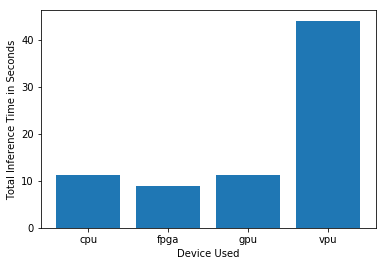

In [34]:
plt.bar(device_list, inference_time)
plt.xlabel("Device Used")
plt.ylabel("Total Inference Time in Seconds")
plt.show()

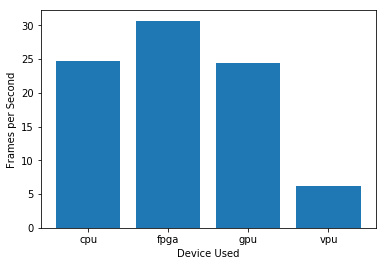

In [35]:
plt.bar(device_list, fps)
plt.xlabel("Device Used")
plt.ylabel("Frames per Second")
plt.show()

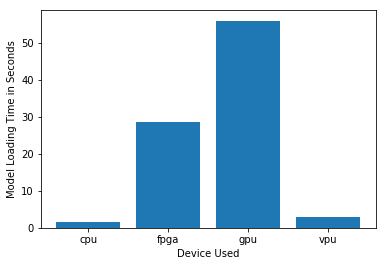

In [36]:
plt.bar(device_list, model_load_time)
plt.xlabel("Device Used")
plt.ylabel("Model Loading Time in Seconds")
plt.show()